## Imports

In [7]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [10]:
def solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for t in range(nt):
        for i in range(1,row-1):
                for j in range(1,col-1):un[i,j]=u[i,j]
        for i in range(1,row-1):
                for j in range(1,col-1):
                    u[i,j]=un[i,j]-nu*dt*((2*un[i,j]-un[i-1,j]-un[i+1,j])/dx**2+(2*un[i,j]-un[i,j-1]-un[i,j+1])/dy**2)
    
    return 0

## Numba accelerator

In [12]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for t in range(nt):
        for i in range(1,row-1):
                for j in range(1,col-1):un[i,j]=u[i,j]
        for i in range(1,row-1):
                for j in range(1,col-1):
                    u[i,j]=un[i,j]-nu*dt*((2*un[i,j]-un[i-1,j]-un[i+1,j])/dx**2+(2*un[i,j]-un[i,j-1]-un[i,j+1])/dy**2)        
    return 0

## Pyccel accelerator

In [14]:
@types('float[:,:]','float[:,:]','int','float','float','float','float')
def solve_2d_diff_pyccel(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    for t in range(nt):
        for i in range(1,row-1):
                for j in range(1,col-1):un[i,j]=u[i,j]
        for i in range(1,row-1):
                for j in range(1,col-1):
                    u[i,j]=un[i,j]-nu*dt*((2*un[i,j]-un[i-1,j]-un[i+1,j])/dx**2+(2*un[i,j]-un[i,j-1]-un[i,j+1])/dy**2)
    
        
    return 0

## Inputs

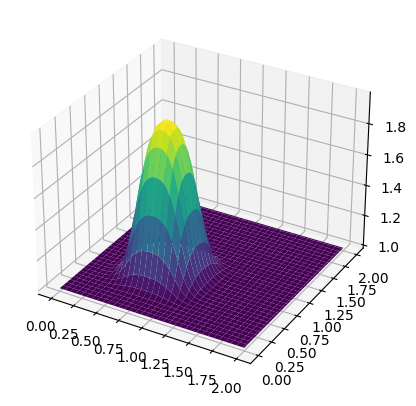

In [9]:
###variable declarations
nt = 51
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))
    

solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

## Call Funtions

### Pure function

In [ ]:
%timeit solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

### Function with numba accelerator

In [8]:
%timeit solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu)

2.3 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [9]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

In [10]:
%timeit solve_2d_diff_f90(u, un, nt, dt, dx, dy, nu)

868 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
